<a href="https://colab.research.google.com/github/revathyshankaran/Multi-Class-Prediction-of-Cirrhosis-Outcomes/blob/main/Cirrhosis_outcome_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             matthews_corrcoef, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('cirrohsis_train.csv')

In [ ]:
df.head(2)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [ ]:
df.isnull().sum()

,0
id,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
df['Status'].value_counts()

,count
Status,
C,4965
D,2665
CL,275


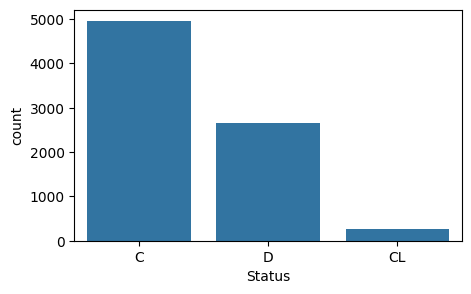

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index);

In [ ]:
columns=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']
le=LabelEncoder()
for x in columns:
  df[x]=le.fit_transform(df[x])

df.head(2)


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0


In [ ]:
x = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter
sm = SVMSMOTE(random_state=55)
x_sample, y_sample = sm.fit_resample(x,y)

<Axes: xlabel='Status', ylabel='count'>

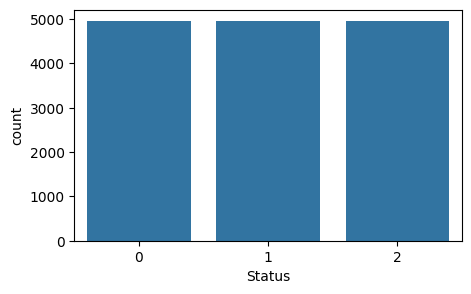

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x=y_sample,data=df)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.15, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

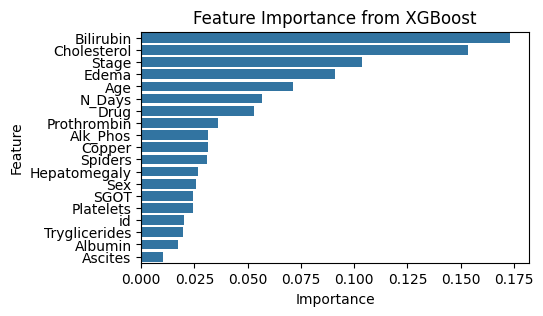

In [ ]:
rf = XGBClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importance from XGBoost')
plt.show()

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Make predictions
predictions_lr = model_lr.predict(X_test_scaled)

In [ ]:

train_accuracy = accuracy_score(y_train, model_lr.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, predictions_lr)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7772
Testing Accuracy: 0.7664


In [ ]:
report = classification_report(y_test, predictions_lr)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       785
           1       0.83      0.81      0.82       770
           2       0.72      0.69      0.70       680

    accuracy                           0.77      2235
   macro avg       0.77      0.76      0.76      2235
weighted avg       0.77      0.77      0.77      2235



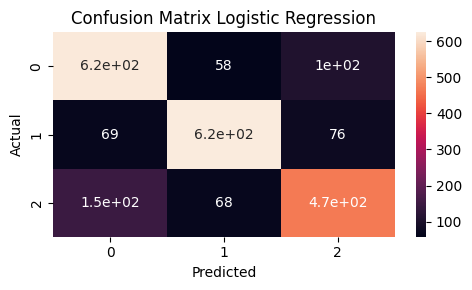

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_lr)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
#sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True)# annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Logistic Regression')
plt.tight_layout()
plt.show()